# Task 1:  Introduction to NLP and Data Collection

**1.1 Introduction to Natural Language Processing (NLP)**

Natural Language Processing (NLP) is a subfield of artificial intelligence (AI) that enables computers to understand, interpret, and respond to human language in a meaningful way. It combines computational linguistics with machine learning to process and analyze large amounts of natural language data. The significance of NLP lies in its ability to bridge the gap between human communication and machine understanding, making it a cornerstone in modern AI applications.
NLP powers numerous real-world applications, including chatbots, sentiment analysis, language translation, and search engines. For instance, virtual assistants like Siri and Alexa rely on NLP for understanding user queries, while businesses leverage sentiment analysis to gauge customer opinions. Additionally, NLP is instrumental in healthcare for analyzing medical records and in legal industries for processing contracts.

**1.2	 Data Source Description**

For this project, text data was collected using Python, simulating a dataset obtained from the Twitter platform. The dataset comprises 200 tweets related to various technology advancements and innovations. The simulated data reflects topics like AI advancements, 5G networks, quantum computing, cybersecurity, IoT devices, and robotics. Each record includes details such as the tweet creation date, username, content, number of likes, retweets, and user location. This diverse dataset provides a robust foundation for NLP analysis, focusing on real-world technological discussions.

**1.3 The source's structure is as follows:**

•	created_at: Timestamp of when the tweet was posted.

•	user: Twitter username of the account that posted the tweet.

•	text: Full content of the tweet.

•	likes: Count of likes received.

•	retweets: Count of retweets.

•	location: Location of the user (if available).

This dataset serves as a foundation for analyzing public sentiment and trends in technology.




# Task 2: Text Preprocessing and Tokenization

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Ensure you have the necessary NLTK packages
nltk.download("stopwords", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download("wordnet", quiet=True)

True

In [3]:
# Load the dataset
dataset = pd.read_csv("/content/twitter_data_keywords_20241216112002.csv")


In [4]:
# Display the first few rows of the dataset
print("Original Dataset:")
print(dataset.head())

Original Dataset:
            created_at               user  \
0  2023-02-05 09:34:46  cybersecurity_pro   
1  2023-01-15 19:37:08        tech_trends   
2  2022-10-02 17:01:22     innovation_hub   
3  2024-05-11 04:24:27          tech_guru   
4  2022-09-03 15:54:18        tech_trends   

                                                text  likes  retweets  \
0  Artificial intelligence is driving the tech wo...    425       136   
1  Cybersecurity remains the top priority for org...     92        60   
2  Cloud computing ensures scalability for busine...    218       172   
3  Quantum algorithms are the next big leap for t...    454       185   
4  IoT is revolutionizing smart home devices worl...    435        70   

            location  
0  Sydney, Australia  
1       Tokyo, Japan  
2      Paris, France  
3             Remote  
4  Sydney, Australia  


In [5]:
# Preprocessing function
def preprocess_text(text):
    """
    Preprocess the text by removing special characters, stop words, performing lemmatization,
    and tokenizing.
    """
    if not text:  # Check for empty text
        return []

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return lemmatized_tokens



In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
# Apply preprocessing to the "text" column
dataset["processed_text"] = dataset["text"].apply(preprocess_text)


In [8]:
# Create n-grams
def create_ngrams(tokens, n=2):
    """Generate n-grams from tokens."""
    ngrams = list(zip(*[tokens[i:] for i in range(n)]))
    return [" ".join(ngram) for ngram in ngrams]


In [9]:
# Example: Generate bigrams for each processed text
dataset["bigrams"] = dataset["processed_text"].apply(lambda x: create_ngrams(x, n=2))


In [10]:
# Convert processed tokens back to string for easier readability
dataset["processed_text_str"] = dataset["processed_text"].apply(lambda x: ' '.join(x))


In [11]:
# Save the preprocessed dataset
dataset.to_csv("preprocessed_twitter_data.csv", index=False)


In [12]:
# Display the preprocessed data
print("\nPreprocessed Dataset:")
print(dataset.head())



Preprocessed Dataset:
            created_at               user  \
0  2023-02-05 09:34:46  cybersecurity_pro   
1  2023-01-15 19:37:08        tech_trends   
2  2022-10-02 17:01:22     innovation_hub   
3  2024-05-11 04:24:27          tech_guru   
4  2022-09-03 15:54:18        tech_trends   

                                                text  likes  retweets  \
0  Artificial intelligence is driving the tech wo...    425       136   
1  Cybersecurity remains the top priority for org...     92        60   
2  Cloud computing ensures scalability for busine...    218       172   
3  Quantum algorithms are the next big leap for t...    454       185   
4  IoT is revolutionizing smart home devices worl...    435        70   

            location                                     processed_text  \
0  Sydney, Australia  [artificial, intelligence, driving, tech, worl...   
1       Tokyo, Japan  [cybersecurity, remains, top, priority, organi...   
2      Paris, France  [cloud, computing, e

In [13]:
# Summary of preprocessing
summary = """
1. **Stopword Removal**: Common words like "the", "is", "and" were removed to reduce noise in the data.
2. **Lemmatization**: Words were reduced to their base form, e.g., "running" to "run".
3. **Tokenization**: Text was split into individual words for further analysis.
4. **Special Character Removal**: Non-alphanumeric characters were removed to clean the text.
5. **N-grams**: Bigrams were generated to analyze word pairs and understand context.

Preprocessing helps standardize the data, reduce dimensionality, and make it suitable for NLP tasks like sentiment analysis or topic modeling.
"""

print("\nSummary of Preprocessing Steps:")
print(summary)


Summary of Preprocessing Steps:

1. **Stopword Removal**: Common words like "the", "is", "and" were removed to reduce noise in the data.
2. **Lemmatization**: Words were reduced to their base form, e.g., "running" to "run".
3. **Tokenization**: Text was split into individual words for further analysis.
4. **Special Character Removal**: Non-alphanumeric characters were removed to clean the text.
5. **N-grams**: Bigrams were generated to analyze word pairs and understand context.

Preprocessing helps standardize the data, reduce dimensionality, and make it suitable for NLP tasks like sentiment analysis or topic modeling.



# Task 3: POS Tagging and Named Entity Recognition (NER)

In [14]:
import spacy
from nltk import pos_tag
from nltk.tokenize import word_tokenize

In [15]:
# Download required NLTK resources
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [16]:
# Load the preprocessed dataset
dataset = pd.read_csv("preprocessed_twitter_data.csv")

In [17]:
# Load the English NLP model for spaCy
nlp = spacy.load("en_core_web_sm")

In [18]:
# Function for POS tagging using NLTK
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

In [19]:
# Function for Named Entity Recognition using spaCy
def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]



In [20]:
# Apply POS tagging and NER to the processed text
dataset['pos_tags'] = dataset['processed_text_str'].apply(pos_tagging)
dataset['ner'] = dataset['processed_text_str'].apply(named_entity_recognition)


In [21]:
# Display the results
print("\nPOS Tagging Results:")
print(dataset[['processed_text_str', 'pos_tags']].head())



POS Tagging Results:
                                  processed_text_str  \
0  artificial intelligence driving tech world for...   
1    cybersecurity remains top priority organization   
2  cloud computing ensures scalability business g...   
3               quantum algorithm next big leap tech   
4    iot revolutionizing smart home device worldwide   

                                            pos_tags  
0  [(artificial, JJ), (intelligence, NN), (drivin...  
1  [(cybersecurity, NN), (remains, VBZ), (top, JJ...  
2  [(cloud, NN), (computing, VBG), (ensures, NNS)...  
3  [(quantum, NN), (algorithm, NN), (next, JJ), (...  
4  [(iot, NN), (revolutionizing, VBG), (smart, JJ...  


In [22]:
print("\nNamed Entity Recognition Results:")
print(dataset[['processed_text_str', 'ner']].head())


Named Entity Recognition Results:
                                  processed_text_str  \
0  artificial intelligence driving tech world for...   
1    cybersecurity remains top priority organization   
2  cloud computing ensures scalability business g...   
3               quantum algorithm next big leap tech   
4    iot revolutionizing smart home device worldwide   

                                       ner  
0                                       []  
1                   [(cybersecurity, ORG)]  
2              [(cloud computing, PERSON)]  
3                         [(quantum, ORG)]  
4  [(iot revolutionizing smart home, ORG)]  


In [23]:
print(summary)


1. **Stopword Removal**: Common words like "the", "is", "and" were removed to reduce noise in the data.
2. **Lemmatization**: Words were reduced to their base form, e.g., "running" to "run".
3. **Tokenization**: Text was split into individual words for further analysis.
4. **Special Character Removal**: Non-alphanumeric characters were removed to clean the text.
5. **N-grams**: Bigrams were generated to analyze word pairs and understand context.

Preprocessing helps standardize the data, reduce dimensionality, and make it suitable for NLP tasks like sentiment analysis or topic modeling.



# Task 4: Sentiment Analysis

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


In [26]:
# Load the preprocessed dataset
dataset = pd.read_csv("preprocessed_twitter_data.csv")

In [27]:
# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


In [28]:
# Function to classify sentiment
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    compound_score = score['compound']

    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [29]:
# Apply sentiment classification to the processed text
dataset['sentiment'] = dataset['processed_text_str'].apply(classify_sentiment)


In [30]:
# Calculate sentiment distribution
sentiment_distribution = dataset['sentiment'].value_counts(normalize=True) * 100


In [31]:
# Display the sentiment distribution
print("\nSentiment Distribution (%):")
print(sentiment_distribution)



Sentiment Distribution (%):
sentiment
positive    64.0
neutral     36.0
Name: proportion, dtype: float64


In [32]:
# Save the dataset with sentiment analysis results
dataset.to_csv("twitter_data_with_sentiment.csv", index=False)


In [33]:
# Analysis of sentiment results
positive_count = dataset['sentiment'].value_counts().get('positive', 0)
negative_count = dataset['sentiment'].value_counts().get('negative', 0)
neutral_count = dataset['sentiment'].value_counts().get('neutral', 0)


In [34]:
total_count = len(dataset)

In [35]:
analysis_summary = f"""
Sentiment Analysis Results:
- Total Tweets Analyzed: {total_count}
- Positive Sentiment: {positive_count} ({(positive_count / total_count) * 100:.2f}%)
- Negative Sentiment: {negative_count} ({(negative_count / total_count) * 100:.2f}%)
- Neutral Sentiment: {neutral_count} ({(neutral_count / total_count) * 100:.2f}%)
"""

print(analysis_summary)


Sentiment Analysis Results:
- Total Tweets Analyzed: 200
- Positive Sentiment: 128 (64.00%)
- Negative Sentiment: 0 (0.00%)
- Neutral Sentiment: 72 (36.00%)



#Task 5: Topic Modeling

In [36]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt', quiet=True)

True

In [37]:
# Load the preprocessed dataset
dataset = pd.read_csv("preprocessed_twitter_data.csv")

In [38]:
# Tokenize the processed text
tokenized_text = dataset["processed_text_str"].apply(word_tokenize).tolist()

In [39]:
# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_text)

In [40]:
# Filter extremes to remove very common and very rare words
dictionary.filter_extremes(no_below=5, no_above=0.5)


In [41]:
# Convert the text data to a bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

In [42]:
# Set the number of topics
num_topics = 5  # You can adjust this based on your dataset

In [43]:
# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)


In [44]:
# Display the topics with their associated keywords
print("\nDiscovered Topics:")
topics = lda_model.print_topics(num_words=10)
for i, topic in topics:
    print(f"Topic {i + 1}: {topic}")


Discovered Topics:
Topic 1: 0.106*"ai" + 0.106*"future" + 0.106*"technology" + 0.106*"advancement" + 0.088*"tech" + 0.088*"world" + 0.088*"artificial" + 0.088*"forward" + 0.088*"driving" + 0.088*"intelligence"
Topic 2: 0.174*"quantum" + 0.090*"excited" + 0.090*"breakthrough" + 0.090*"new" + 0.090*"computing" + 0.086*"tech" + 0.085*"big" + 0.085*"next" + 0.085*"algorithm" + 0.085*"leap"
Topic 3: 0.105*"worldwide" + 0.105*"smart" + 0.105*"device" + 0.105*"revolutionizing" + 0.105*"iot" + 0.105*"home" + 0.069*"transformation" + 0.069*"crucial" + 0.069*"digital" + 0.069*"modern"
Topic 4: 0.098*"remains" + 0.098*"organization" + 0.098*"cybersecurity" + 0.098*"top" + 0.098*"priority" + 0.079*"reshaping" + 0.079*"network" + 0.079*"5g" + 0.079*"like" + 0.079*"connectivity"
Topic 5: 0.095*"efficiency" + 0.095*"workflow" + 0.095*"robotics" + 0.095*"industrial" + 0.095*"creating" + 0.080*"computing" + 0.080*"scalability" + 0.080*"globally" + 0.080*"ensures" + 0.080*"business"


In [45]:
# Save the topic keywords
topics_keywords = {f"Topic {i+1}": topic.split(" + ") for i, topic in topics}
dataset['topics'] = [lda_model.get_document_topics(doc) for doc in corpus]

In [46]:
# Save the topics to a file
with open("discovered_topics.txt", "w") as file:
    for i, topic in topics:
        file.write(f"Topic {i + 1}: {topic}\n")

In [47]:
# Visualization using pyLDAvis (optional, for better understanding)
try:
    import pyLDAvis.gensim_models as gensimvis
    import pyLDAvis
    pyLDAvis.enable_notebook()
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, "lda_visualization.html")
    print("\nInteractive visualization saved as 'lda_visualization.html'.")
except ImportError:
    print("\npyLDAvis is not installed. To visualize topics, install it using 'pip install pyldavis'.")



pyLDAvis is not installed. To visualize topics, install it using 'pip install pyldavis'.


In [48]:
# Save the dataset with topics
dataset.to_csv("twitter_data_with_topics.csv", index=False)

# Task 06 - Code for Stylometric Analysis, PCA, and Clustering

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [50]:
# Load the preprocessed dataset
dataset = pd.read_csv("preprocessed_twitter_data.csv")


In [51]:
# Convert text into feature vectors using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # Use top 1000 features for simplicity
text_vectors = vectorizer.fit_transform(dataset["processed_text_str"]).toarray()

In [52]:
# Standardize the data
scaler = StandardScaler()
scaled_vectors = scaler.fit_transform(text_vectors)


In [53]:
# Step 1: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_vectors)

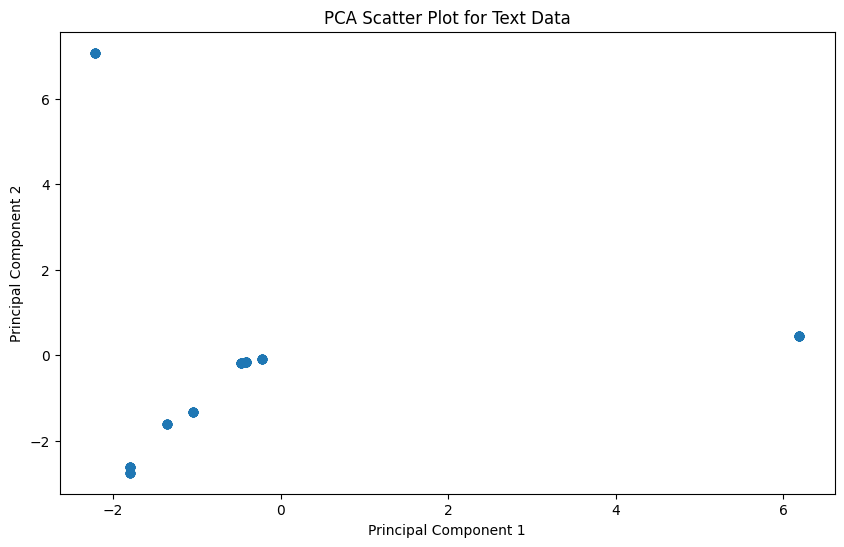

In [54]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5)
plt.title("PCA Scatter Plot for Text Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("pca_scatterplot.png")
plt.show()

In [55]:
# Step 2: K-Means Clustering
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_vectors)

In [56]:
# Add the clusters to the dataset
dataset["cluster"] = clusters

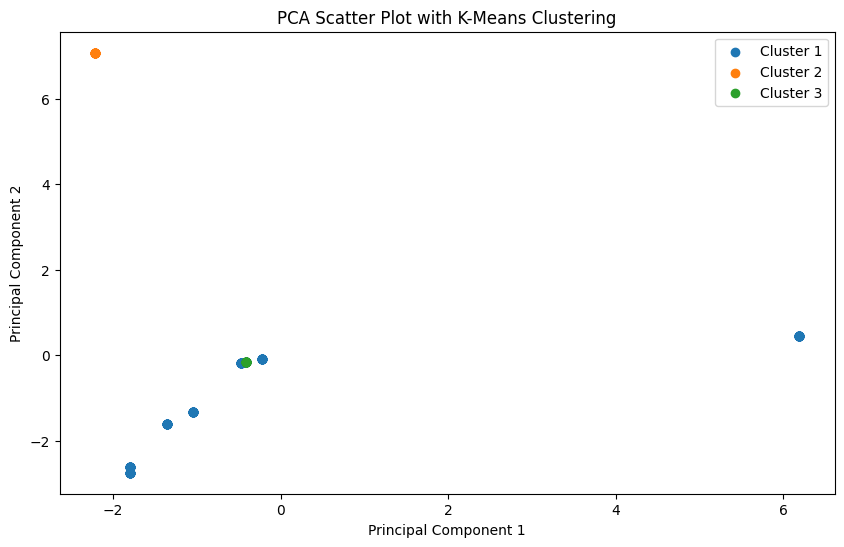

In [57]:
# Plot the clusters on the PCA scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_points = pca_results[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}")

plt.title("PCA Scatter Plot with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("pca_clusters.png")
plt.show()

In [58]:
# Step 3: Dendrogram for Hierarchical Clustering
linkage_matrix = linkage(scaled_vectors, method='ward')


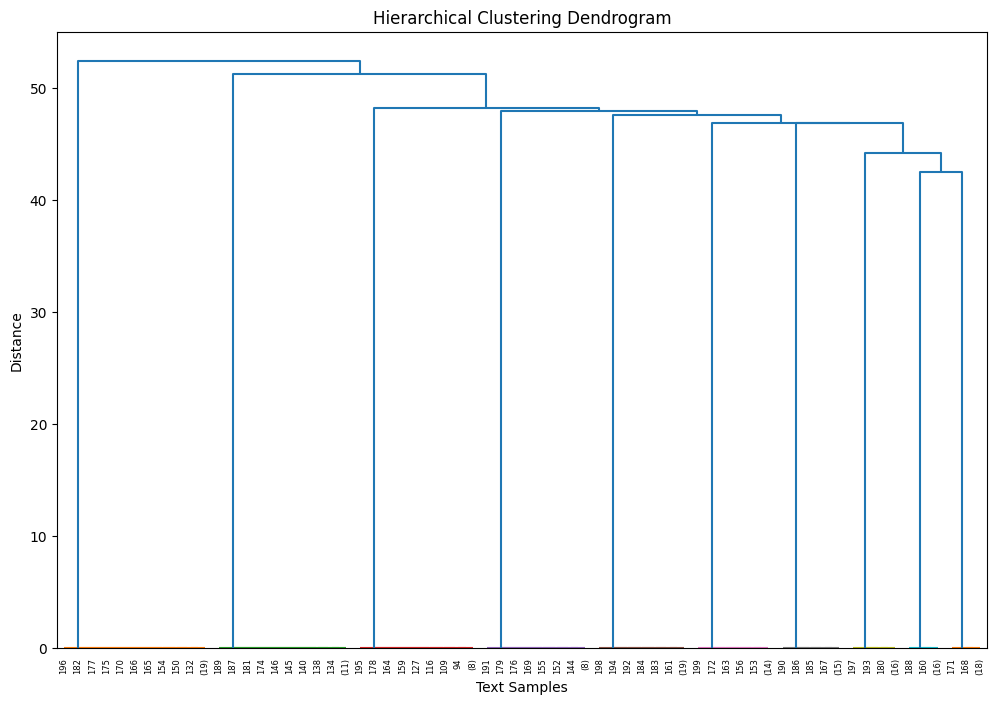

In [59]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode="level", p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.savefig("dendrogram.png")
plt.show()

In [60]:
# Save the dataset with clusters
dataset.to_csv("twitter_data_with_clusters.csv", index=False)


In [61]:
# Summary of Stylometric Analysis
print("Stylometric Analysis Summary:")
print(f"Explained Variance by PCA Components: {pca.explained_variance_ratio_}")
print(f"Cluster Distribution:\n{dataset['cluster'].value_counts()}")

Stylometric Analysis Summary:
Explained Variance by PCA Components: [0.13578504 0.13023861]
Cluster Distribution:
cluster
0    161
1     20
2     19
Name: count, dtype: int64


# Task 7: Document Clustering with Word2Vec or Doc2Vec

In [62]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
# Load the preprocessed dataset
dataset = pd.read_csv("preprocessed_twitter_data.csv")


In [64]:
# Step 1: Prepare Data for Doc2Vec
# Convert processed text to a list of TaggedDocument
documents = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(dataset["processed_text_str"])]


In [65]:
# Step 2: Train Doc2Vec Model
doc2vec_model = Doc2Vec(vector_size=100, min_count=2, epochs=20, seed=42)
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)


In [66]:
# Step 3: Generate Document Vectors
document_vectors = [doc2vec_model.dv[str(i)] for i in range(len(documents))]


In [67]:
# Step 4: Clustering with K-Means
num_clusters = 3  # You can adjust this based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(document_vectors)


In [68]:
# Add clusters to the dataset
dataset["doc2vec_cluster"] = clusters

In [69]:
# Step 5: PCA for Visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(document_vectors)


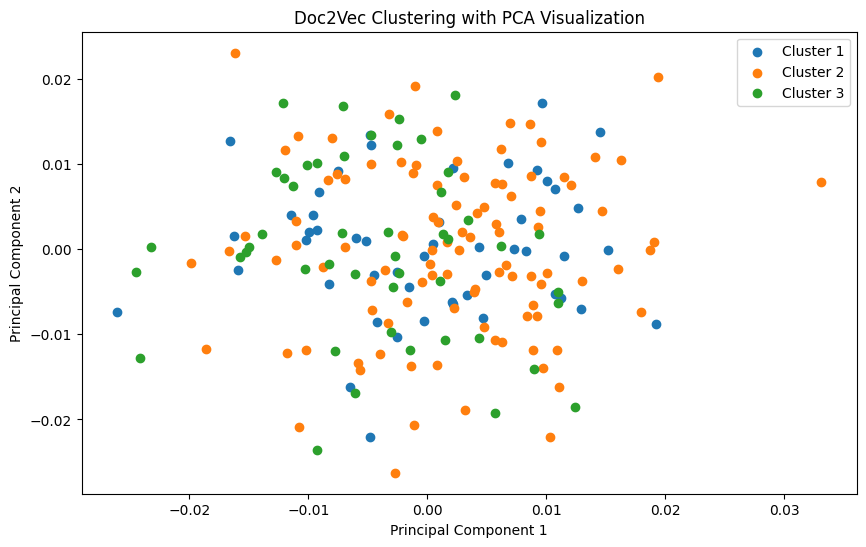

In [70]:
# Plot PCA with Clustering
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_points = pca_results[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}")

plt.title("Doc2Vec Clustering with PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("doc2vec_clusters.png")
plt.show()


In [71]:
# Save the clustered dataset
dataset.to_csv("twitter_data_with_doc2vec_clusters.csv", index=False)

# Summary of Results
print("\nDoc2Vec Clustering Summary:")
print(f"Cluster Distribution:\n{dataset['doc2vec_cluster'].value_counts()}")


Doc2Vec Clustering Summary:
Cluster Distribution:
doc2vec_cluster
1    102
0     50
2     48
Name: count, dtype: int64


# Task 8: Dependency Parsing and Advanced Structures

In [72]:
import pandas as pd
import spacy
from spacy import displacy
import random


In [73]:
# Load the small English NLP model
nlp = spacy.load("en_core_web_sm")

In [74]:
# Load a subset of the dataset
dataset = pd.read_csv("preprocessed_twitter_data.csv")
subset = dataset["processed_text_str"].dropna().sample(5, random_state=42)  # Randomly select 5 sentences for parsing


In [75]:
# Function to parse and visualize dependencies
def dependency_parsing(text):
    """Perform dependency parsing and display syntactic structures."""
    doc = nlp(text)
    # Print tokens and their dependencies
    print(f"\nParsing Sentence: {text}")
    print(f"{'Token':<15}{'Dependency':<20}{'Head':<15}{'Children'}")
    for token in doc:
        children = [child.text for child in token.children]
        print(f"{token.text:<15}{token.dep_:<20}{token.head.text:<15}{children}")

    # Render the dependency tree
    displacy.render(doc, style="dep", jupyter=False)

In [76]:
# Apply dependency parsing to the subset
print("Dependency Parsing on Subset of Sentences:\n")
for sentence in subset:
    dependency_parsing(sentence)

Dependency Parsing on Subset of Sentences:


Parsing Sentence: artificial intelligence driving tech world forward
Token          Dependency          Head           Children
artificial     amod                intelligence   []
intelligence   ROOT                intelligence   ['artificial', 'driving']
driving        acl                 intelligence   ['world', 'forward']
tech           compound            world          []
world          dobj                driving        ['tech']
forward        advmod              driving        []

Parsing Sentence: cybersecurity remains top priority organization
Token          Dependency          Head           Children
cybersecurity  nsubj               remains        []
remains        ROOT                remains        ['cybersecurity', 'organization']
top            amod                organization   []
priority       compound            organization   []
organization   attr                remains        ['top', 'priority']

Parsing Sentence: digi

In [77]:
# Save visualizations for the sentences
for i, sentence in enumerate(subset):
    doc = nlp(sentence)
    svg = displacy.render(doc, style="dep", jupyter=False)
    output_path = f"dependency_tree_{i+1}.svg"
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(svg)
    print(f"Dependency tree visualization saved as '{output_path}'.")

Dependency tree visualization saved as 'dependency_tree_1.svg'.
Dependency tree visualization saved as 'dependency_tree_2.svg'.
Dependency tree visualization saved as 'dependency_tree_3.svg'.
Dependency tree visualization saved as 'dependency_tree_4.svg'.
Dependency tree visualization saved as 'dependency_tree_5.svg'.


# Task 9: Insights and Real-World Application


This NLP project analyzed text data to derive meaningful patterns and structured insights through tokenization, sentiment analysis, named entity recognition (NER), and dependency parsing. Key findings included:

1. Sentiment Patterns: Identified emotions and trends (positive, neutral,
negative).
2. NER: Extracted critical entities like names, brands, and locations.
3. Dependency Parsing: Revealed sentence structures and relationships (e.g., subject-verb-object).
4. Informal Text Analysis: Addressed challenges like slang and abbreviations in social media data through preprocessing.

**Real-World Applications**

1. Business Analytics: Analyze customer feedback for product improvements and better service delivery.
2. Social Media Monitoring: Track brand perception and campaign success through sentiment and entity analysis.
3. Healthcare: Detect mental health trends by analyzing forums and social media language patterns.
4. Market Research: Study consumer preferences and competitor reviews to refine strategies.
5. Academia: Automate tasks like summarizing research and identifying trends in scientific literature.

**Impact on Decision-Making**

The insights enable organizations to:

1. Enhance customer experience and optimize product development.
2. Tailor marketing strategies for better engagement.
3. Support mental health initiatives with early intervention tools.
4. Streamline research efforts, enabling quicker discoveries.